In [1]:
# multiple seedds
##############################################################
############### Correlation 2 WITH SWITCH  ################################
##############################################################
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from tqdm import tqdm

file_format= 'PNG'

exp_name = 'new_code_switch_duration'
exp_name = 'short_runs'
exp_name = 'short_runs_with_learning'
exp_name = 'short_runs_rapid_switches'

files = os.listdir('./results/' + exp_name+'/')
rates_files = [file for file in files if 'saved_rates' in file]
weights_files = [file for file in files if 'saved_weights' in file]

# strings to look for in filtering file for each experiemnt to compare 
comp_one = 's_30.0_' # with with OFC switches 180
comp_two = 's_0.0_' # with MD clampped to one neuron

comp_one_files = [os.path.join('./results/'+exp_name,file) for file in rates_files if comp_one in file]
comp_two_files = [os.path.join('./results/'+exp_name,file) for file in rates_files if (comp_two in file)]

print(f'comp_one_files:')
comp_one_files

comp_one_files:


['./results/short_runs_rapid_switches/fig_saved_rates_30.0_0.0_1.0_20210131-201913.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_1.0_1.0_20210131-201910.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_2.0_1.0_20210131-201915.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_3.0_1.0_20210131-201910.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_4.0_1.0_20210131-201911.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_5.0_1.0_20210131-201913.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_6.0_1.0_20210131-201913.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_7.0_1.0_20210131-201905.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_8.0_1.0_20210131-201905.pickle',
 './results/short_runs_rapid_switches/fig_saved_rates_30.0_9.0_1.0_20210131-201909.pickle']

In [5]:
# Inputs is [trial x no of inputs]: col 0 is up cue, 1: down cue, 2: v1, 3: v3, 4: ofc switch signal
print('dot products of MD 0 v1 md0v1: ', np.dot(MDrates.mean(axis=1)[:,0] , Inputs[:,2]))
print('dot products of MD 1 v1 md1v1: ', np.dot(MDrates.mean(axis=1)[:,1] , Inputs[:,2]))
print('dot products of MD 1 v2 md1v2: ', np.dot(MDrates.mean(axis=1)[:,1] , Inputs[:,3]))

NameError: name 'MDrates' is not defined

In [41]:
mrates = MDrates.mean(axis=1)
scores = np.array([np.dot(mrates[:,mi] , Inputs[:,vi]) for mi in range(2) for vi in range(2,4)])
print('           md0v1,         md0v2          md1v1,        md1v2        ')
print('scores: ', scores)
scores_norm = scores/np.linalg.norm(scores)
print('normalized: ', scores_norm)

           md0v1,         md0v2          md1v1,        md1v2        
scores:  [2093.96503492  177.63996508   80.10865131 2448.28634869]
normalized:  [0.64878815 0.05503946 0.02482064 0.75857006]


NameError: name 'MDrates' is not defined

In [2]:
def grade_md0v1(MDrates, Inputs): #Takes MDrates and Inputs and outputs score MD0 x V1
    mrates = MDrates.mean(axis=1)
    scores = np.array([np.dot(mrates[:,mi] , Inputs[:,vi]) for mi in range(2) for vi in range(2,4)])
    scores_norm = scores/np.linalg.norm(scores)
    return (scores_norm[0]) #MD0 V1 score


scores = []
for fi, file_name in enumerate(comp_one_files[:]):

    filehandler = open(file_name, 'rb')
    rates_one = pickle.load(filehandler)
    filehandler.close()
    _, _, MDrates, _, Inputs, _, _= rates_one
    score = grade_md0v1(MDrates,Inputs)
    print(f'score is: {score} for fi: {fi}')
    scores.append(score)
    del rates_one
    del MDrates
    del Inputs
    
# filter the seed runs that have the 'right' MD value association 
# as a list
good_seeds = [int(score > 0.5) for score in scores]
# as a numpy array of scores.
pscores = np.array(scores)
# can be used as a filter for other numpy arrays.
np.array(comp_one_files)[pscores >0.5]


score is: 0.8218993376064263 for fi: 0
score is: 0.8309338502083962 for fi: 1
score is: 0.8252516033596258 for fi: 2
score is: 0.8194937917020919 for fi: 3
score is: 0.08535812352184655 for fi: 4
score is: 0.8280692573232324 for fi: 5
score is: 0.8272584752861645 for fi: 6
score is: 0.8357622713654322 for fi: 7
score is: 0.8149343782116306 for fi: 8
score is: 0.11297259801812772 for fi: 9


array(['./results/short_runs_rapid_switches/fig_saved_rates_30.0_0.0_1.0_20210131-201913.pickle',
       './results/short_runs_rapid_switches/fig_saved_rates_30.0_1.0_1.0_20210131-201910.pickle',
       './results/short_runs_rapid_switches/fig_saved_rates_30.0_2.0_1.0_20210131-201915.pickle',
       './results/short_runs_rapid_switches/fig_saved_rates_30.0_3.0_1.0_20210131-201910.pickle',
       './results/short_runs_rapid_switches/fig_saved_rates_30.0_5.0_1.0_20210131-201913.pickle',
       './results/short_runs_rapid_switches/fig_saved_rates_30.0_6.0_1.0_20210131-201913.pickle',
       './results/short_runs_rapid_switches/fig_saved_rates_30.0_7.0_1.0_20210131-201905.pickle',
       './results/short_runs_rapid_switches/fig_saved_rates_30.0_8.0_1.0_20210131-201905.pickle'],
      dtype='<U87')

In [3]:
npy_files = [file for file in files if 'corrs_switch' in file]
npy_files

['corrs_switch_s_30.0_.npy']

In [4]:
all_correlations =np.load('./results/'+exp_name+'/corrs_switch_'+comp_one+ '.npy' )
# corrs_switch1 =np.load('./corrs_switch_lim1.npy' )

In [9]:
pscores

array([0.82189934, 0.83093385, 0.8252516 , 0.81949379, 0.08535812,
       0.82806926, 0.82725848, 0.83576227, 0.81493438, 0.1129726 ])

In [18]:
# pscores= 1-pscores

In [7]:
corrs_switch0.shape

(10, 4800, 500, 2)

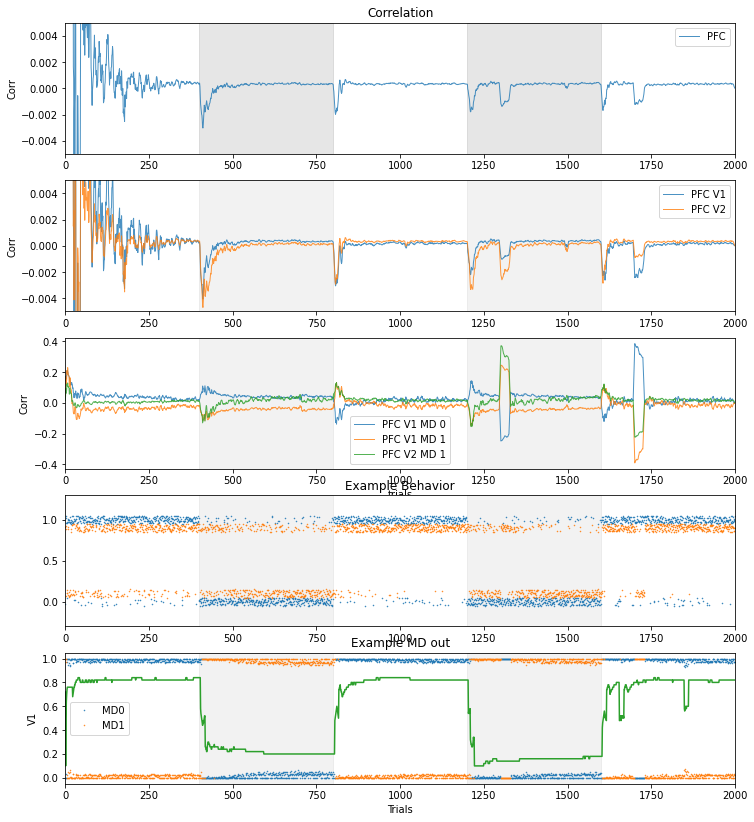

In [13]:
## Treying the t wo MDs all_correlations and corrs_switch1
# So no I need to avg over  all of PFMC and MD but only for the nodes that are doing md0v1
# np.convolve( corrs_switch0, np.ones((5,))/5, axis=1, mode='valid' )
# all_correlations= corrs_switch0

fig, axes = plt.subplots(5,1)
fig.set_size_inches([12,10])
ax = axes.flatten()[0]

# ax.plot(np.convolve( np.mean(corrs_switch[opposites,:, 0:50 ], axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC Down-V1')
# ax.plot(np.convolve( np.mean(corrs_switch[opposites,:,50:100], axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC Up-V2')

# All PFC and all MD
selected_corr = all_correlations[pscores >0.5, :].mean(axis=-1).mean(axis=-1)
ax.plot(np.convolve(selected_corr.mean(axis=0) , np.ones((5,))/5, mode='valid' ), label='PFC', linewidth=1, alpha=0.8)
# ax.plot(np.convolve( np.mean(np.concatenate((all_correlations[:,:,:],corrs_switch1[:,:,:]), axis=0), axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC', linewidth=1, alpha=0.8)
ax.legend()
ax.set_ylim([-0.005, 0.005])
ax.set_ylabel('Corr')
ax.set_title('Correlation')

Nblocks = 5
tpb = 400
for ib in range(1, Nblocks,2):
            ax.axvspan(tpb* ib, tpb*(ib+1), alpha=0.1, color='grey')

ax = axes.flatten()[1]
# Populations v1 v2
v1_selected = np.concatenate((all_correlations[:,:,0:100,:],all_correlations[:,:,200:300,:]), axis=2)
v1_selected = v1_selected[pscores >0.5].mean(axis=-2) #avg over PFC
v1_selected = v1_selected.mean(axis=-1) #avg over MD

v2_selected = np.concatenate((all_correlations[:,:,100:200,:],all_correlations[:,:,300:400,:]), axis=2)
v2_selected = v2_selected[pscores >0.5].mean(axis=-2) #avg over PFC
v2_selected = v2_selected.mean(axis=-1) #avg over MD

ax.plot(np.convolve( v1_selected.mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC V1', linewidth=1, alpha=0.8)
ax.plot(np.convolve( v2_selected.mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC V2', linewidth=1, alpha=0.8)
ax.set_ylim([-0.005, 0.005])
ax.set_ylabel('Corr')
ax.legend()
# select only trials where ofc went against md
# opposites = [1,4,4,4,2,3]#[1,3,4,6,8,9] # NOT SURE THIS IS WORKING trials where ofc switched pfc against current strategy
# ax.plot(np.convolve( np.mean(np.concatenate((corrs_switch[opposites,:,0:50],corrs_switch[opposites,:,100:150]), axis=2), axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC V1', linewidth=1, alpha=0.8)
# ax.plot(np.convolve( np.mean(np.concatenate((corrs_switch[opposites,:,50:100],corrs_switch[opposites,:,150:200]), axis=2), axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC V2', linewidth=1, alpha=0.8)


ax = axes.flatten()[2]
# MD 0 1 vs v1 v2
v1_selected = np.concatenate((all_correlations[:,:,0:100,:],all_correlations[:,:,200:300,:]), axis=2)
v1_selected = v1_selected[pscores >0.5].mean(axis=-2) #avg over PFC
# v1_selected = v1_selected.mean(axis=-1) #avg over MD

v2_selected = np.concatenate((all_correlations[:,:,100:200,:],all_correlations[:,:,300:400,:]), axis=2)
v2_selected = v2_selected[pscores >0.5].mean(axis=-2) #avg over PFC
# v2_selected = v2_selected.mean(axis=-1) #avg over MD

ax.plot(np.convolve( v1_selected.mean(axis=0)[:,0], np.ones((5,))/5, mode='valid' ), label='PFC V1 MD 0', linewidth=1, alpha=0.8)
ax.plot(np.convolve( v1_selected.mean(axis=0)[:,1], np.ones((5,))/5, mode='valid' ), label='PFC V1 MD 1', linewidth=1, alpha=0.8)
ax.plot(np.convolve( v2_selected.mean(axis=0)[:,1], np.ones((5,))/5, mode='valid' ), label='PFC V2 MD 1', linewidth=1, alpha=0.8)

ax.set_ylabel('Corr')
# ax.set_ylim([-0.005, 0.005])
# select only trials where ofc went against md
# opposites = [1,4,4,4,2,3]#[1,3,4,6,8,9] # NOT SURE THIS IS WORKING trials where ofc switched pfc against current strategy
# ax.plot(np.convolve( np.mean(np.concatenate((corrs_switch[opposites,:,0:50],corrs_switch[opposites,:,100:150]), axis=2), axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC V1', linewidth=1, alpha=0.8)
# ax.plot(np.convolve( np.mean(np.concatenate((corrs_switch[opposites,:,50:100],corrs_switch[opposites,:,150:200]), axis=2), axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ), label='PFC V2', linewidth=1, alpha=0.8)
            
# ax.set_xlim([1900,3600])
# ax.set_ylim([-0.02, 0.02])
ax.set_xlabel('trials')
ax.legend()
# file_format='EPS'

# Plotting one behavioral example
# Loading one exmaple run

file_name = np.array(comp_one_files)[pscores >0.5][0]
filehandler = open(file_name, 'rb')
rates_one = pickle.load(filehandler)
filehandler.close()
PFCrates, MDinputs, MDrates, Outrates, Inputs, Targets, MSEs= rates_one

# Corre btn MD 0 and PFC V1 vs whole of PFC
Trials, Tsteps, Neurons = PFCrates.shape

out_higher_mean = 1.*( np.mean( Outrates[:, :,0], axis=1) > np.mean( Outrates[:, :,1], axis=1) )
Matches =  1. * (Targets[:,0] == Inputs[:,0])                   #+ np.random.uniform(-noise, noise, size=(Ntrain,) )
Responses= 1.* (out_higher_mean == Inputs[:,0]) * 0.8 + 0.1     #+ np.random.uniform(-noise, noise, size=(Ntrain,) )
Corrects = 1. * (Targets[:,0] == out_higher_mean)

## Plot behavior, v1, 
tpb = 400
Ntrain = len(Matches)
noise =0.05
ax = axes.flatten()[3]
_= ax.plot(Matches + np.random.uniform(-noise, noise, size=(Ntrain,)  ),    'o', markersize = 0.5)
_= ax.plot(Responses+ np.random.uniform(-noise, noise, size=(Ntrain,) ),  'o', markersize = 0.5)
# ax.set_title('Blue o: Correct    Orange x: response')
ax.set_ylim([-0.3, 1.3])
ax.set_title('Example Behavior')
## Plot MD rates
# ax2.plot(MDinputs.mean(axis=1)  ,    'o', markersize = 0.5)
ax2 = axes.flatten()[4]
fax2 = ax2.plot(MDrates.mean(axis=1)  ,    'o', markersize = 0.5)
_ = ax2.plot(Inputs[:,2]*0.8 +0.1, label = 'v0')
ax2.legend(fax2, ['MD0', 'MD1'])
ax2.set_title('Example MD out')
ax2.set_ylabel('V1')
ax2.set_xlabel('Trials')
# ax2.set_ylim([-0.3, 1.3])
# del PFCrates, MDinputs, MDrates, Outrates, Inputs, Targets, MSEs, rates_one

for ax in axes:
    for ib in range(1, Nblocks,2):
            ax.axvspan(tpb* ib, tpb*(ib+1), alpha=0.1, color='grey')
            ax.set_xlim([0, Nblocks*tpb])


plt.savefig(f'corr_final_v1_v2.{file_format}', dpi=300, format=file_format)

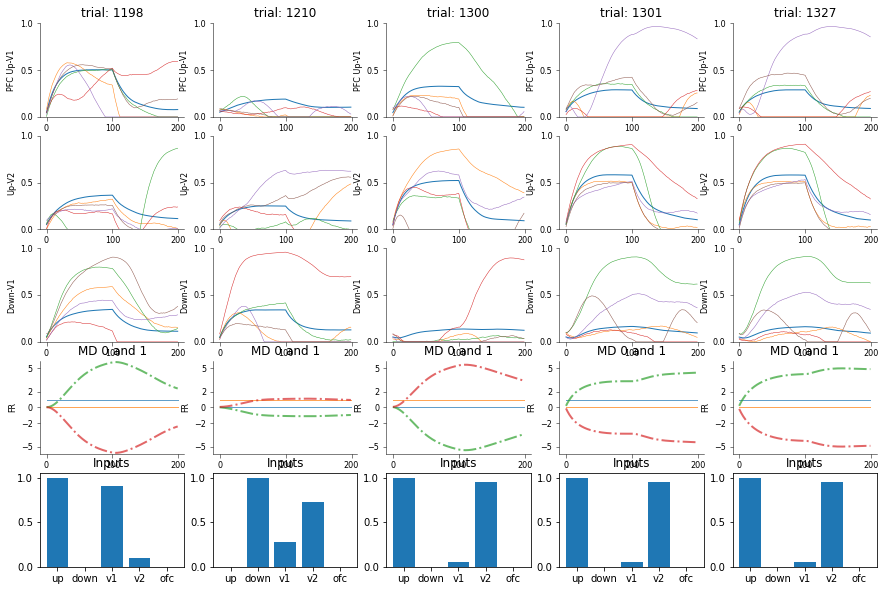

In [16]:
# Visualize specific trials. A bunch of v1 v2 neurons some up some down, and MD inputs. Which is the same as my Trial vis!
from config import Config
config = Config({'seed': 8})
import plot_utils as pltu
p = config.Nsub//2

# PLOT within trial activity for 4 selected trials:
t_interest = config.trials_per_block*3
trials_to_draw = [t_interest + tt for tt in [-2 ,10,100,101,127 ]]# [0, config.trials_per_block, int(config.Nblocks//4*config.trials_per_block)]
fig, axes = plt.subplots(5,len(trials_to_draw))#, sharex=True)# , sharey=True)
fig.set_size_inches([3*len(trials_to_draw), 10])
yticks = (0, 0.5,1)
xticks = [0, 100, 200]

for ti, trial in enumerate((trials_to_draw)):
    ax = axes[0,ti]
    ax.plot(range(200),np.mean( PFCrates[trial,:,:p], axis=1), '-', linewidth=1)
    ax.plot(range(200), PFCrates[trial,:,:5], '-', linewidth=0.5)
    pltu.beautify_plot(ax,x0min=False,y0min=False, yticks=yticks, xticks=xticks)
    pltu.axes_labels(ax,str(Inputs[trial]),'PFC Up-V1')
    ax.set_title('trial: ' + str(trial))
    ax.set_ylim([0,1])

    ax = axes[1,ti]
    ax.plot(range(200),np.mean( PFCrates[trial,:,p:p*2], axis=1), '-', linewidth=1)
    ax.plot(range(200), PFCrates[trial,:,p:p+5], '-', linewidth=0.5)
    pltu.beautify_plot(ax,x0min=False,y0min=False, yticks=yticks, xticks=xticks)
    pltu.axes_labels(ax,str(Targets[trial]),'Up-V2')
    ax.set_ylim([0,1])

    ax = axes[2,ti]
    ax.plot(range(200),np.mean( PFCrates[trial,:,p*2:p*3], axis=1), '-', linewidth=1)
    ax.plot(range(200), PFCrates[trial,:,2*p:2*p+5], '-', linewidth=0.5)
    pltu.beautify_plot(ax,x0min=False,y0min=False, yticks=yticks, xticks=xticks)
    pltu.axes_labels(ax,'','Down-V1')
    ax.set_ylim([0,1])

    ax = axes[3,ti]
    ax.plot(range(200), MDrates[trial,:,:], '-', linewidth=1, alpha=0.7)
    ax.plot(range(200), MDinputs[trial,:,:], '-.', linewidth=2, alpha=0.7)
    pltu.beautify_plot(ax,x0min=False,y0min=False, yticks=[-5, -2, 0, 2, 5], xticks=xticks)
    pltu.axes_labels(ax,'','FR')
    ax.set_title('MD 0 and 1')
    ax.set_ylim([-6, 6])

    ax = axes[4,ti]
    ax.bar(['up', 'down', 'v1', 'v2', 'ofc'], Inputs[trial])
    ax.set_title('Inputs')
#     pltu.beautify_plot(ax,x0min=False,y0min=False)


In [17]:
prates = PFCrates.mean(1) #average over trials
mrates = MDrates.mean(1)
v1     = Inputs[:,2]
ofc    = Inputs[:,4]



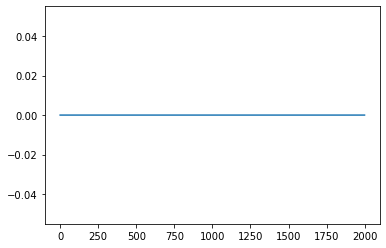

In [18]:
plt.plot(ofc)

In [ ]:
exp_name = 'ofc_v1v2_no_switch'

#get files
files = os.listdir('./results/' + exp_name+'/')
corrects_files = [file for file in files if 'Corrects' in file]

# comp_one = '0200' # MD clamped to one neuron active
comp_one = '0.3'
comp_two = '1.0_20'

comp_one_files = [os.path.join('./results/'+exp_name,file) for file in corrects_files if comp_one in file]
comp_two_files = [os.path.join('./results/'+exp_name,file) for file in corrects_files if (comp_two in file) and ('0200' not in file)]

corr_one = [np.convolve(np.load(c1f), np.ones((40,))/40, mode='valid') for c1f in comp_one_files]
corr_two = [np.convolve(np.load(c2f), np.ones((40,))/40, mode='valid') for c2f in comp_two_files]

corrects_one = np.stack(corr_one)
corrects_two = np.stack(corr_two) # shape 2, 2500 [no of files, no of trials]

mean_one = np.mean(corrects_one, axis= 0)
std_one  = np.std (corrects_one, axis= 0)

mean_two = np.mean(corrects_two, axis= 0)
std_two  = np.std (corrects_two, axis= 0)


cog_flex_avg_one = [np.mean(corrects_one[:,s:s+100]) for s in range(0, 3000, 500)]
cog_flex_avg_two = [np.mean(corrects_two[:,s:s+100]) for s in range(0, 3000, 500)]
cog_flex_avg_one[-1]=(np.mean(corrects_one))
cog_flex_avg_two[-1]=(np.mean(corrects_two))

cog_flex_std_one = np.array([np.std(corrects_one[:,s:s+100]) for s in range(0, 3000, 500)])
cog_flex_std_two = np.array([np.std(corrects_two[:,s:s+100]) for s in range(0, 3000, 500)])
cog_flex_std_one[-1]=np.std(corrects_one)
cog_flex_std_two[-1]=np.std(corrects_two)

plt.bar(range(1,19,3),cog_flex_avg_one)
plt.errorbar(range(1,19,3),cog_flex_avg_one, yerr=cog_flex_std_one*1.65 / np.sqrt(10), fmt='o', color='black')
# *1.65 ttimes std div by sqrt(n) to get CI 
plt.bar(range(2,19,3),cog_flex_avg_two, color='tab:orange')
plt.errorbar(range(2,19,3),cog_flex_avg_two, yerr=cog_flex_std_two*1.65 / np.sqrt(10), fmt='o', color='black')
plt.savefig(f'error_bars.{file_format}', format=file_format)

plt.figure()
plt.plot(range(len(mean_one)), mean_one)
plt.fill_between(range(len(mean_one)), mean_one-std_one, mean_one+std_one, alpha=.4)

plt.plot(range(len(mean_two)), mean_two)
plt.fill_between(range(len(mean_two)), mean_two-std_two, mean_two+std_two, alpha=.4)

plt.savefig(f'average_correct_w_wout_MD.{file_format}', format=file_format)


In [ ]:
# Code to calculate correlations. Moved it to correlation_script.py because runs better in ipython terminal. 
corrs_switch = np.zeros(shape=(10, 4800, 500, 2))
for fi, file_name in tqdm(enumerate(comp_one_files[:])):

    filehandler = open(file_name, 'rb')
    rates_one = pickle.load(filehandler)
    filehandler.close()
    PFCrates, MDinputs, MDrates, Outrates, Inputs, Targets, MSEs= rates_one

    prates= np.mean(PFCrates, axis=1)

    # Corre btn MD 0 and PFC V1 vs whole of PFC
    Trials, Tsteps, Neurons = PFCrates.shape
    MDneurons = 2

    print(f'fi: {fi} trials {Trials}, {Tsteps} {Neurons}')
    
    for t in (range(Trials)):
        for n in range(Neurons):
            for m in range(MDneurons):
            
                corrs_switch[fi,t,n,m] = np.corrcoef(MDinputs[t,:,m], PFCrates[t,:,n])[0,1]
    del rates_one
    del PFCrates
    del prates
        
ax = plt.gca()
ax.plot(np.convolve( np.mean(corrs_switch[:,:,100:200,0], axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ))
ax.plot(np.convolve( np.mean(corrs_switch[:,:,0:100,  0], axis=2).mean(axis=0), np.ones((5,))/5, mode='valid' ))
# ax.set_xlim([1900,2200])
# plt.savefig(f'corr_input_populations_switch2.{file_format}', format=file_format)
try:
    np.save('./results/' + exp_name+'/' + 'corrs_switch_'+ comp_one, corrs_switch, )
except:
    pass


0it [00:00, ?it/s]

fi: 0 trials 4800, 200 500


1it [10:47, 647.16s/it]

fi: 1 trials 4800, 200 500


2it [21:31, 646.35s/it]

fi: 2 trials 4800, 200 500


3it [32:16, 645.97s/it]

fi: 3 trials 4800, 200 500


4it [43:10, 648.46s/it]

fi: 4 trials 4800, 200 500


5it [53:59, 648.35s/it]

fi: 5 trials 4800, 200 500


6it [1:04:44, 647.38s/it]

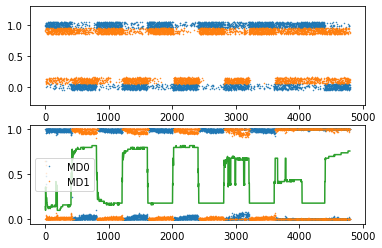

In [4]:
# Plotting one behavioral example
# Loading one exmaple run
file_name = comp_one_files[7]
filehandler = open(file_name, 'rb')
rates_one = pickle.load(filehandler)
filehandler.close()
PFCrates, MDinputs, MDrates, Outrates, Inputs, Targets, MSEs= rates_one

# Corre btn MD 0 and PFC V1 vs whole of PFC
Trials, Tsteps, Neurons = PFCrates.shape

out_higher_mean = 1.*( np.mean( Outrates[:, :,0], axis=1) > np.mean( Outrates[:, :,1], axis=1) )
Matches =  1. * (Targets[:,0] == Inputs[:,0])                   #+ np.random.uniform(-noise, noise, size=(Ntrain,) )
Responses= 1.* (out_higher_mean == Inputs[:,0]) * 0.8 + 0.1     #+ np.random.uniform(-noise, noise, size=(Ntrain,) )
Corrects = 1. * (Targets[:,0] == out_higher_mean)

## Plot behavior, v1, 
tpb = 400
Ntrain = len(Matches)
noise =0.05
fig, axes = plt.subplots(2,1)
ax, ax2 = axes
_= ax.plot(Matches + np.random.uniform(-noise, noise, size=(Ntrain,)  ),    'o', markersize = 0.5)
_= ax.plot(Responses+ np.random.uniform(-noise, noise, size=(Ntrain,) ),  'o', markersize = 0.5)
# ax.set_title('Blue o: Correct    Orange x: response')
ax.set_ylim([-0.3, 1.3])

## Plot MD rates
# ax2.plot(MDinputs.mean(axis=1)  ,    'o', markersize = 0.5)
fax2 = ax2.plot(MDrates.mean(axis=1)  ,    'o', markersize = 0.5)
_ = ax2.plot(Inputs[:,2]*0.8 +0.1, label = 'v0')
ax2.legend(fax2, ['MD0', 'MD1'])
# ax2.set_title('MD input and out')
# ax2.set_ylim([-0.3, 1.3])
del PFCrates, MDinputs, MDrates, Outrates, Inputs, Targets, MSEs, rates_one
